In [1]:
# IMPORTS

import math
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from scipy import linspace
import scipy.integrate as integrate

In [49]:
# FUNÇÕES


#Calculando a distribuição exponencial: #r(t) + f(t) = 1     r(t) = 1 - F(t)   f(t) = 1 - e^-lambd*t

def DistExpo(lamb, t):
    
    SegundoTermo = 1 - math.e**(-lamb*t)
    PrimeiroTermo = 1 - SegundoTermo()
    DistExpoR = PrimeiroTermo + SegundoTermo    
    
    return DistExpoR

#Calculando a distribuição Hypoexponencial - PDF: 

def DistHypoPDF(lamb1 , lamb2, t):
    
    Numerador = lamb1*lamb2
    Denominador = lamb2 - lamb1
    PrimeiroTermo = Numerador/Denominador
    SegundoTermo = math.e**(-lamb1*t) - math.e**(-lamb2*t)
    DistHypoPDFR = PrimeiroTermo*SegundoTermo
    
    return DistHypoPDFR
    
#Calculando a distribuição Hypoexponencial - CDF:    
    
def DistHypoCDF(lamb1 , lamb2, t):
    
    PrimeiroTermo = 1 - (lamb2/(lamb2-lamb1))*math.e**(-lamb1*t)
    SegundoTermo = lamb1/(lamb2-lamb1)*math.e**(-lamb2*t)
    DistHypoCDFR = PrimeiroTermo*SegundoTermo
    
    return DistHypoCDFR

#Calculando a distribuição Hypoexponencial - MTTF:\n",

def MTTF(lamb2, lamb1,t) :
    
    ##Numerador = lamb2 + lamb1
    ##Denominador = lamb1 * lamb2
    ##M = Numerador/Denominador
    M = ((lamb1*lamb2)/(lamb2 - lamb1)) * ((math.e ** (-lamb1 * t)) - (math.e ** (-lamb2*t)))
    return M
       
    
#Plotando graficos HypoPDF


def PlotHypoPDF(lamb1, lamb2, space):
    
    for i in space:
        resultado = DistHypoPDF(lamb1 , lamb2, i)
        plt.bar(i, resultado)
plt.show()


#Calculando a Redundância TMR:
def tmr(lamb2, lamb1, lamb , t):
    r = 1 - DistHypoCDF(lamb2 * lamb , lamb1 * lamb , t)
    
    return r

def tmrr(lamb2, lamb1, lamb , t):
    ##r = 1 - F(lamb*lamb2, lamb*lamb1, t)
    r = lamb2*R2(-(lamb * lamb1), t)  - lamb1*R2(-(lamb * lamb2),t)
    return r

def F(lamb2,lamb1,t):
    f = 1 - ((lamb2/(lamb2-lamb1)) * (math.e ** (-lamb1 * t))) + ((lamb1/(lamb2 - lamb1)) * (math.e ** (-lamb2 * t)))
    
    return f
    
def R1(lamb2 , lamb1,t):
    r = 1 - F(lamb2,lamb1,t)
    
    return r

def R2 (lamb,t):
    r = 1 - (1 - (math.e ** (-lamb*t)))
    
    return r

def plot(lamb, taxaFalha1, taxaFalha2):
    space = linspace(0,1.5)

    sistema_2_dispositivos = 1 - ((1 - R1(taxaFalha1 * lamb, taxaFalha2 * lamb,space)) ** 2)
    sistema_3_dispositivos = 1 - ((1 - R1(taxaFalha1 * lamb, taxaFalha2 * lamb,space)) ** 3)
    sistema_4_dispositivos = 1 - ((1 - R1(taxaFalha1 * lamb, taxaFalha2 * lamb,space)) ** 4)
    ##MTTFR = MTTF(taxaFalha1 * lamb, taxaFalha2 * lamb, space)
    ##print (len(sistema_2_dispositivos))
    ##a = 
    MTTF_2 = np.mean(sistema_2_dispositivos)
    ##MTTFR = []
    ##for i in range(0,len(sistema_2_dispositivos)):
      ##  MTTFR.append((sistema_2_dispositivos + sistema_3_dispositivos + sistema_4_dispositivos) / 3)
    
    plt.plot(space, sistema_2_dispositivos, label = '2 dispositivos')
    plt.plot(space, sistema_3_dispositivos, label = '3 dispositivos')
    plt.plot(space, sistema_4_dispositivos, label = '4 dispositivos')
    ##plt.plot(space,MTTF_2)
    plt.ylabel('Reliability(t)')
    plt.xlabel('Time(t)')
    plt.show()
    

In [51]:
plot(1 ,3,2 )

plot(3 ,3,2 )

plot(5 ,3,2 )

plot(7 ,3,2 )

ValueError: x and y must have same first dimension, but have shapes (50,) and (1,)

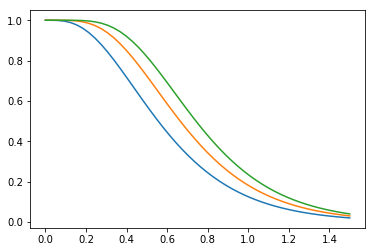

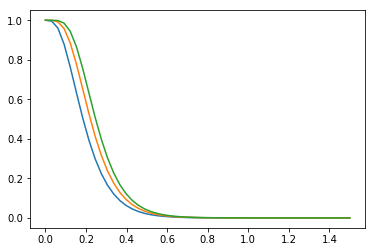

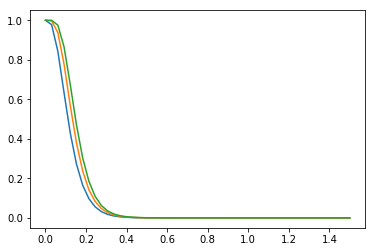

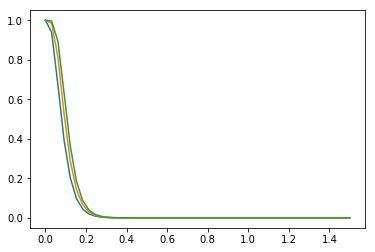

In [10]:
plot(1 ,5,4 )

plot(3 ,5,4 )

plot(5 ,5,4 )

plot(7 ,5,4 )

In [24]:
space = linspace(0,1.5)

sistema_2_dispositivos = 1 - ((1 - R1(3 * 5, 2 * 5,space)) ** 2)
sistema_3_dispositivos = 1 - ((1 - R1(3 * 5, 2 * 5,space)) ** 3)
sistema_4_dispositivos = 1 - ((1 - R1(3 * 5, 2 * 5,space)) ** 4)
##MTTF = MTTF(taxaFalha1 * lamb, taxaFalha2 * lamb, space)
##print (len(sistema_2_dispositivos))
##a = 
##MTTF = np.mean(sistema_2_dispositivos,sistema_3_dispositivos,sistema_4_dispositivos)
m = []
for i in range(0,len(sistema_2_dispositivos)):
    m.append((sistema_2_dispositivos + sistema_3_dispositivos + sistema_4_dispositivos) / 3)
print (m)

[array([  1.00000000e+00,   9.98944739e-01,   9.88159384e-01,
         9.56018318e-01,   8.96398618e-01,   8.11303098e-01,
         7.09106083e-01,   6.00473130e-01,   4.94830571e-01,
         3.98653677e-01,   3.15315741e-01,   2.45746897e-01,
         1.89294076e-01,   1.44463808e-01,   1.09447731e-01,
         8.24432506e-02,   6.18208609e-02,   4.61915614e-02,
         3.44162251e-02,   2.55853334e-02,   1.89865038e-02,
         1.40695658e-02,   1.04140676e-02,   7.70123422e-03,
         5.69084258e-03,   4.20271039e-03,   3.10218082e-03,
         2.28890637e-03,   1.68827512e-03,   1.24490943e-03,
         9.17766089e-04,   6.76460760e-04,   4.98520718e-04,
         3.67337330e-04,   2.70643422e-04,   1.99383024e-04,
         1.46873559e-04,   1.08185534e-04,   7.96836884e-05,
         5.86878408e-05,   4.32223640e-05,   3.18312209e-05,
         2.34414662e-05,   1.72625478e-05,   1.27120420e-05,
         9.36089681e-06,   6.89306719e-06,   5.07576497e-06,
         3.73753536e-06

In [54]:
m = np.mean(sistema_3_dispositivos)
print(m)

0.185985049586
